<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [105]:
# %pip install --upgrade plotly

###  Import Statements


In [106]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements

### Notebook Presentation

In [107]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [108]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎

In [109]:
data.shape

(506, 14)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


## Data Cleaning - Check for Missing Values and Duplicates

In [111]:
data.isna().any()

,0
CRIM,False
ZN,False
INDUS,False
CHAS,False
NOX,False
RM,False
AGE,False
DIS,False
RAD,False
TAX,False


In [112]:
data.duplicated().sum()

np.int64(0)

## Descriptive Statistics

In [113]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [114]:
print(f"There are {round(data['PTRATIO'].mean(),2)} per teacher on average.")

There are 18.46 per teacher on average.


In [115]:
print(f"The average price of a home is: {round(data['PRICE'].mean() * 1000,2)}.")

The average price of a home is: 22532.81.


In [116]:
print(f"The minimum and maxium values of the CHAS are {data['CHAS'].min()} and {data['CHAS'].max()}.")

The minimum and maxium values of the CHAS are 0.0 and 1.0.


In [117]:
print(f"The minimum and maxium number of rooms per dwelling are {data['RM'].min()} and {data['RM'].max()}.")

The minimum and maxium number of rooms per dwelling are 3.561 and 8.78.


## Visualise the Features

#### House Prices 💰

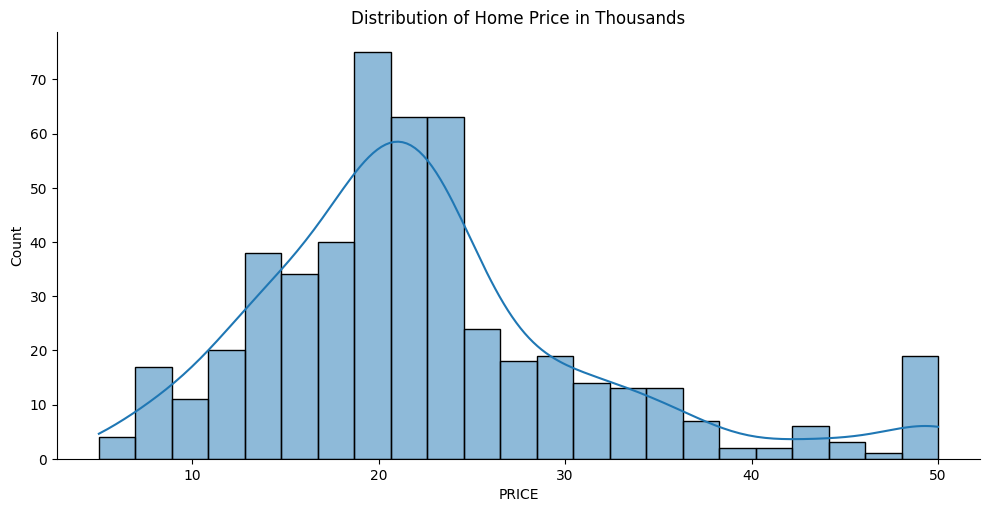

In [118]:
sns.displot(data['PRICE'], kde=True, kind='hist', aspect=2)
plt.title('Distribution of Home Price in Thousands')
plt.show()

#### Distance to Employment - Length of Commute 🚗

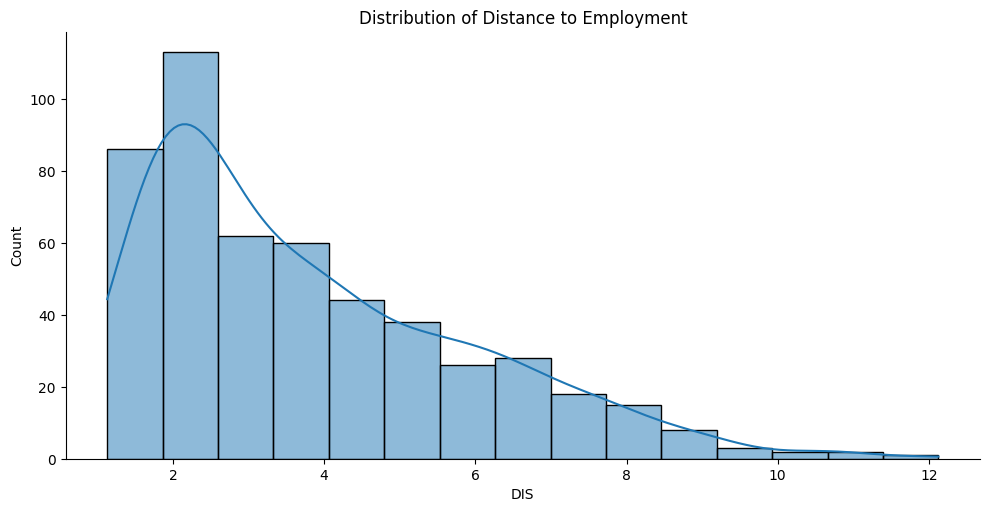

In [119]:
sns.displot(data['DIS'], kde=True, kind='hist', aspect=2)
plt.title('Distribution of Distance to Employment')
plt.show()

#### Number of Rooms

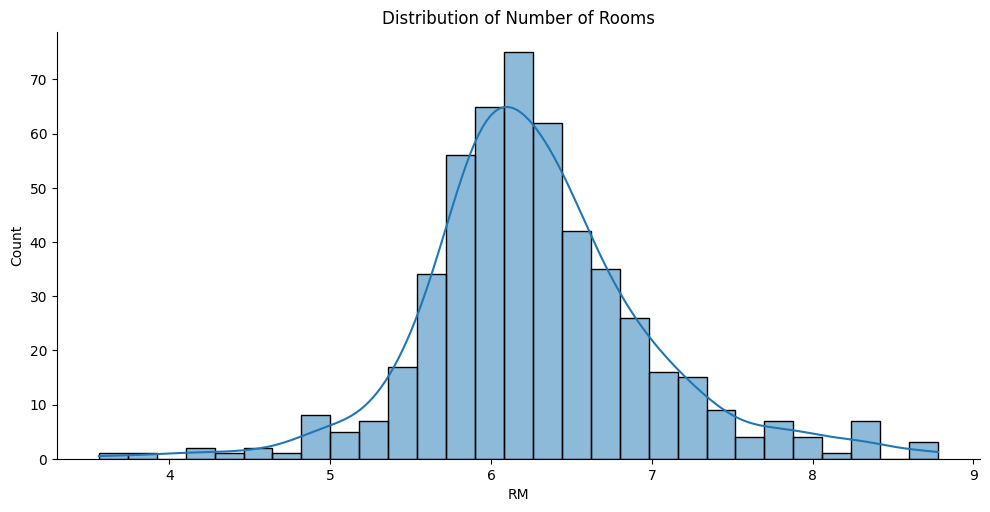

In [120]:
sns.displot(data['RM'], kde=True, kind='hist', aspect=2)
plt.title('Distribution of Number of Rooms')
plt.show()

#### Access to Highways 🛣

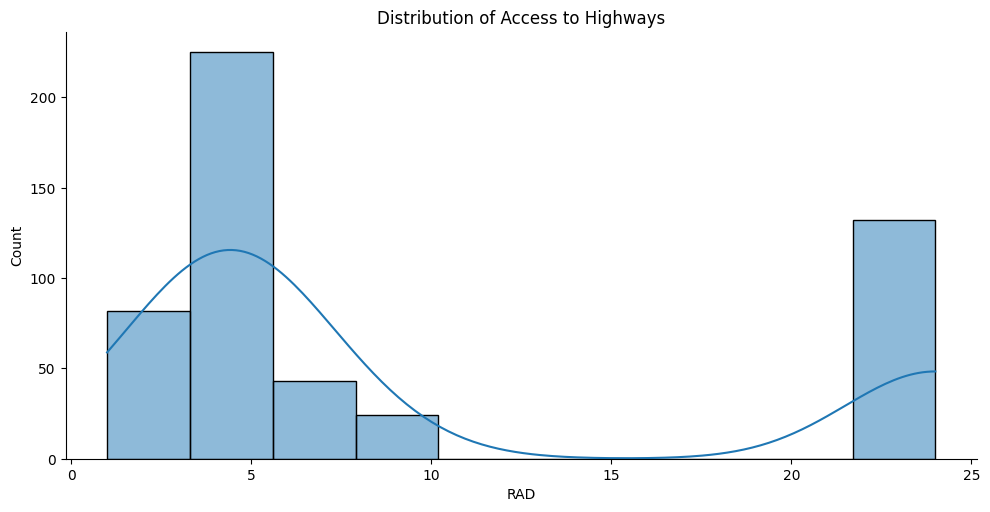

In [121]:
sns.displot(data['RAD'], kde=True, kind='hist', aspect=2)
plt.title('Distribution of Access to Highways')
plt.show()

#### Next to the River? ⛵️

In [122]:
chas_counts = data['CHAS'].value_counts().reset_index()
chas_counts.columns = ['CHAS', 'count']

fig = px.bar(chas_counts,
             x='CHAS',
             y='count',
             labels={'CHAS': 'Next to River?', 'count': 'Number of Homes'},
             title='Number of Homes Next to the Charles River')

fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['No', 'Yes']))

fig.show()


Most of the houses are not near a river.

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

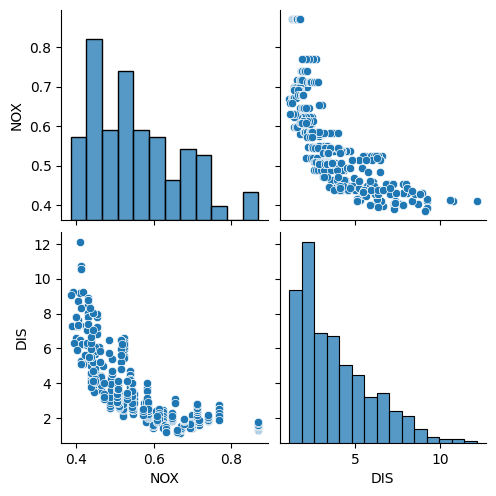

In [123]:
sns.pairplot(data[['NOX', 'DIS']])

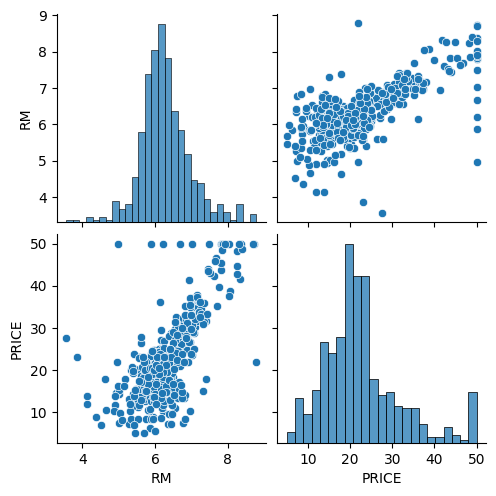

In [124]:
sns.pairplot(data[['RM', 'PRICE']])

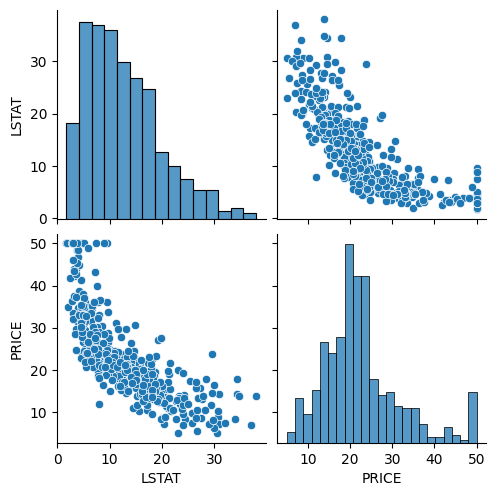

In [125]:
sns.pairplot(data[['LSTAT', 'PRICE']])

1️⃣ NOX (pollution) and DIS (distance to employment centers)

Relationship: Negative

Areas closer to employment centers (low DIS) tend to have higher NOX levels because they are nearer to city centers, industrial zones, and high-traffic areas where pollution is worse.

As you move farther out (high DIS), NOX levels generally decrease because these areas are more suburban or rural, with less traffic and fewer pollution sources.

2️⃣ RM (number of rooms) and PRICE (home value)

Relationship: Positive

Homes with more rooms (larger homes) are typically more valuable.

Buyers are willing to pay more for bigger homes, so as RM increases, PRICE tends to increase as well.

3️⃣ LSTAT (percentage of lower status population / poverty) and PRICE (home value)

Relationship: Negative

Higher LSTAT values (more poverty or lower socio-economic status in the area) are typically associated with lower home prices.

Neighborhoods with higher poverty rates often have lower demand and property values.

#### Distance from Employment vs. Pollution


Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`.

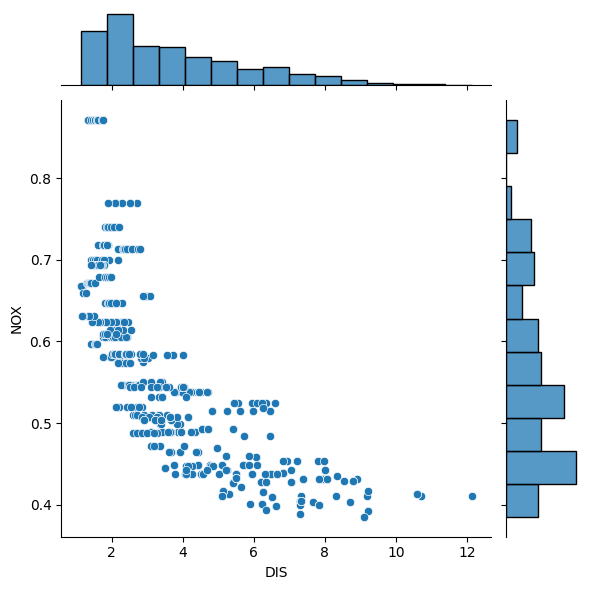

In [126]:
sns.jointplot(data, x='DIS', y ='NOX')

There’s a clear negative relationship:

When DIS is small (close to employment centers), NOX levels are high.

As DIS increases (farther from employment centers), NOX levels decrease.

The trend looks somewhat nonlinear — NOX drops sharply at first as DIS increases, then levels out at lower NOX levels as DIS gets large.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution


Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`.

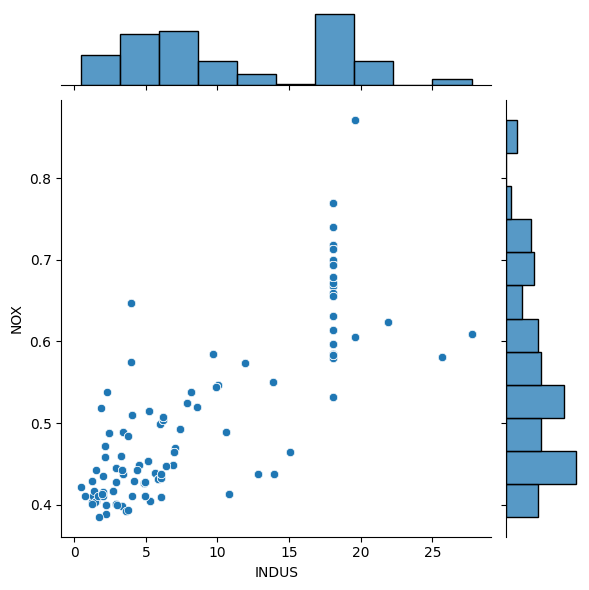

In [127]:
sns.jointplot(data, x='INDUS', y ='NOX')

There is a positive relationship overall — as INDUS increases, NOX levels tend to rise.

The scatterplot shows that areas with low INDUS values generally have lower NOX, while areas with high INDUS values (especially around 18–20) have much higher NOX.

You can also see a cluster around INDUS ≈ 18 where NOX jumps up significantly — indicating that at this level of industrial land, NOX pollution is consistently high.

The relationship isn’t perfectly linear — there’s some spread, and certain INDUS values (especially at high INDUS) seem to correspond to a fixed range of NOX.

#### % of Lower Income Population vs Average Number of Rooms



Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`.

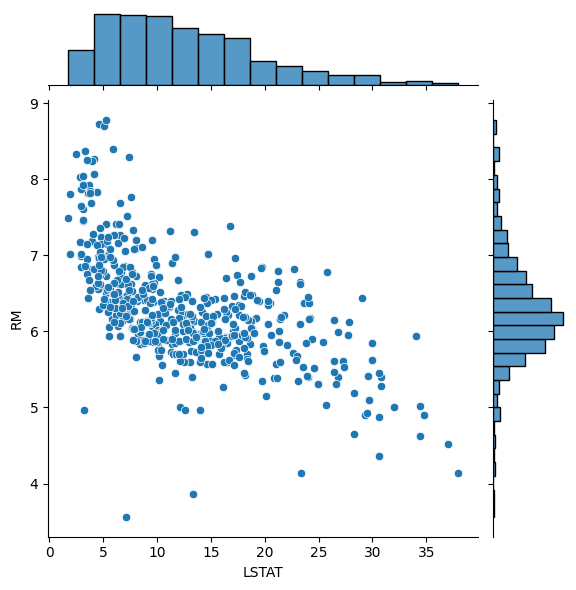

In [128]:
sns.jointplot(data, x='LSTAT', y ='RM')

There is a clear negative relationship:

As LSTAT increases (more poverty / lower socioeconomic status), RM decreases — homes tend to have fewer rooms.

When LSTAT is low (wealthier areas), RM tends to be higher (larger homes with more rooms).

The points form a downward-sloping cloud, with some scatter but a strong overall trend.

#### % of Lower Income Population versus Home Price


Compare LSTAT with PRICE using Seaborn's `.jointplot()`.

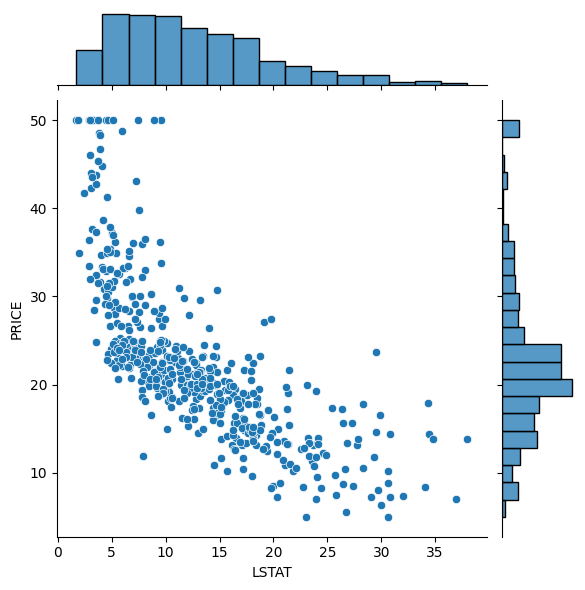

In [129]:
sns.jointplot(data, x='LSTAT', y ='PRICE')

There is a strong negative relationship:

As LSTAT increases (meaning more poverty / lower socioeconomic status), PRICE decreases — home values drop significantly.

When LSTAT is low (wealthier areas), PRICE is higher, often clustering above 30 or even 50 (in whatever units PRICE is measured, typically $1,000s).

The trend is fairly tight — little scatter — with a slightly curved, nonlinear pattern: home prices fall more rapidly at lower LSTAT values, then the decline slows as LSTAT gets very high.

#### Number of Rooms versus Home Value


Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`.

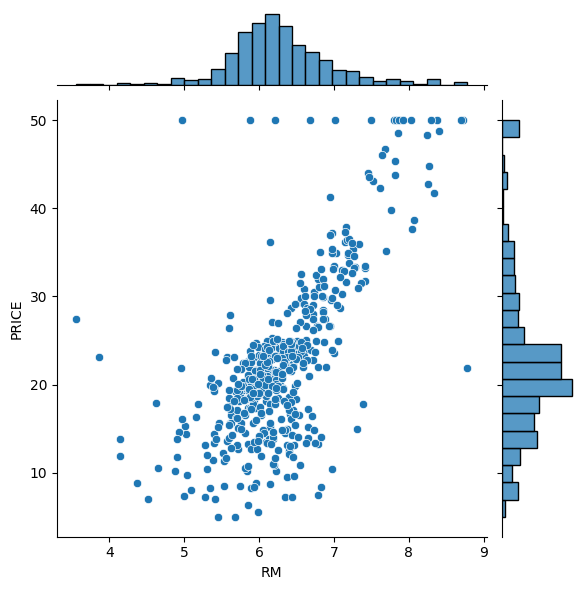

In [130]:
sns.jointplot(data, x='RM', y ='PRICE')

There is a strong positive relationship:

As RM increases (larger homes with more rooms), PRICE increases — home values go up.

The scatter points form a clear upward trend: houses with more rooms generally have higher prices.

There is some scatter (e.g., homes with ~6 rooms can have a wide range of prices), but overall the trend is strong.

You can also see that at the high end of RM (e.g., >7.5), PRICE often clusters near the upper limit of 50, suggesting price caps or outliers.

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.


In [131]:
from sklearn.model_selection import train_test_split

X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

In [132]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

r_squared_train = regressor.score(X_train, y_train)
print(f"R-squared on the training data: {r_squared_train:.4f}")

R-squared on the training data: 0.7501


### Evaluate the Coefficients of the Model

In [133]:
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': regressor.coef_
})

print("Model Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {regressor.intercept_:.2f}")

Model Coefficients:
    Feature  Coefficient
0      CRIM        -0.13
1        ZN         0.06
2     INDUS        -0.01
3      CHAS         1.97
4       NOX       -16.27
5        RM         3.11
6       AGE         0.02
7       DIS        -1.48
8       RAD         0.30
9       TAX        -0.01
10  PTRATIO        -0.82
11        B         0.01
12    LSTAT        -0.58

Intercept: 36.53


**Is RM’s coefficient also positive?**
Yes, RM’s coefficient is +3.11. This means RM has a positive relationship with PRICE in the regression model, consistent with the positive trend observed in the scatter plot. More rooms are associated with higher home prices.



**What is the sign on the LSTAT coefficient? Does it match intuition and the scatter plot?**
The LSTAT coefficient is -0.58. This negative sign matches both intuition and the scatter plot. Higher poverty levels (higher LSTAT) are associated with lower home prices.



**Do the other coefficients have the expected sign?**
Most of the coefficients align with expectations:

* NOX is negative (-16.27), as higher pollution lowers price.
* CHAS is positive (+1.97), as being near the river increases price.
* PTRATIO is negative (-0.82), as higher pupil-teacher ratios (worse schools) reduce price.
* CRIM is negative (-0.13), as higher crime lowers price.

Some coefficients are less intuitive:

* DIS is negative (-1.48), which is surprising. Typically, greater distance to employment centers would be associated with higher suburban prices, but here it shows the opposite.
* AGE is slightly positive (+0.02), whereas we might expect older homes to have lower prices.

Some coefficients are very small or negligible:

* INDUS (-0.01), TAX (-0.01), B (0.00) show minimal or no effect.
* RAD is slightly positive (+0.30).
* ZN is small positive (+0.06).



**How much more expensive is a home with 6 rooms compared to 5 rooms?**
Since the RM coefficient is +3.11, a home with 6 rooms is predicted to cost 3.11 units more than a home with 5 rooms, holding all else constant.



**What is the premium you would have to pay for an extra room?**
The model estimates that each additional room adds 3.11 units to the predicted price. This is the premium for one extra room according to the model.


### Analyse the Estimated Values & Regression Residuals



In [134]:
predicted_values = regressor.predict(X_train)
residuals = (y_train - predicted_values)

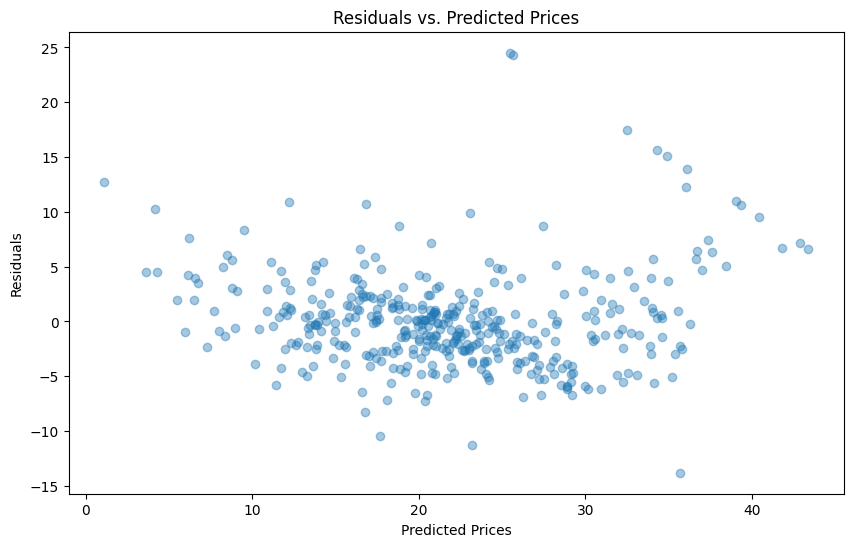

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.4)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

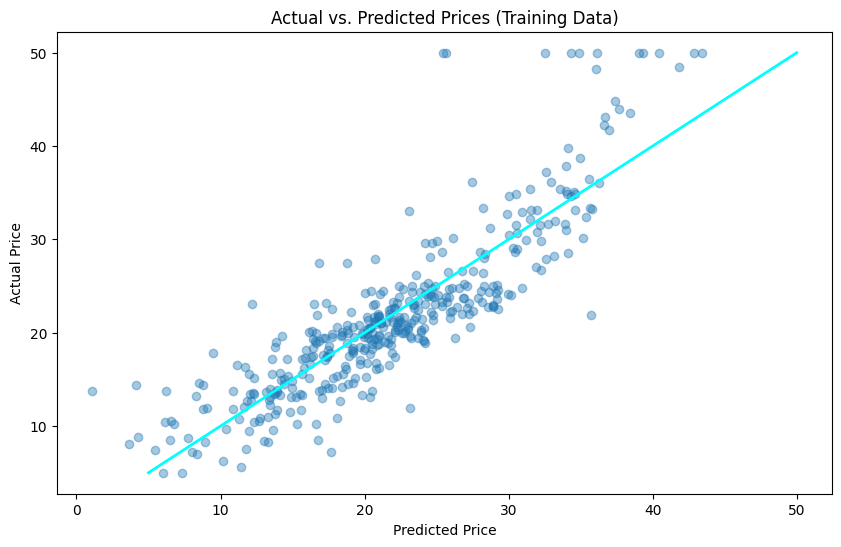

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, y_train, alpha=0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'cyan', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs. Predicted Prices (Training Data)')
plt.show()

Mean of residuals: 0.0000
Skewness of residuals: 1.4594


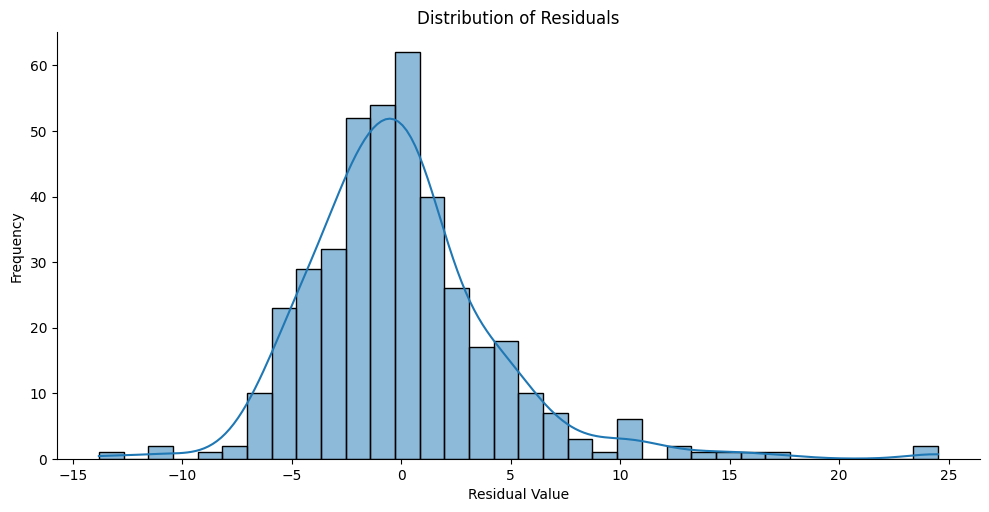

In [137]:
print(f"Mean of residuals: {residuals.mean():.4f}")
print(f"Skewness of residuals: {residuals.skew():.4f}")

sns.displot(residuals, kde=True, kind='hist', aspect=2)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

The zero mean is good — no systematic bias.

The high positive skewness suggests:

- Model errors are not evenly spread.

- There are outliers or non-linear patterns the model isn’t capturing.

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.


Skewness of prices: 1.1081


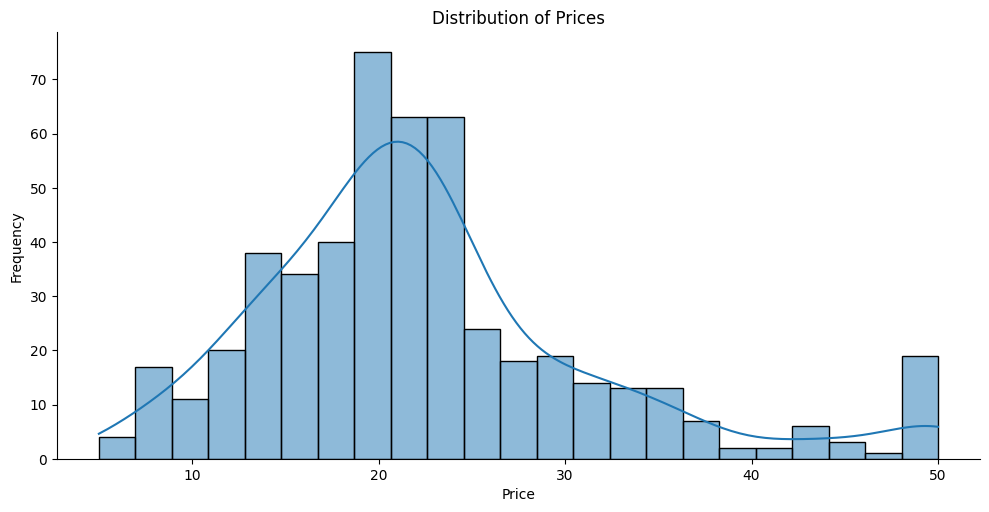

In [138]:
print(f"Skewness of prices: {data['PRICE'].skew():.4f}")

sns.displot(data['PRICE'], kde=True, kind='hist', aspect=2)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Skewness of log prices: -0.3303


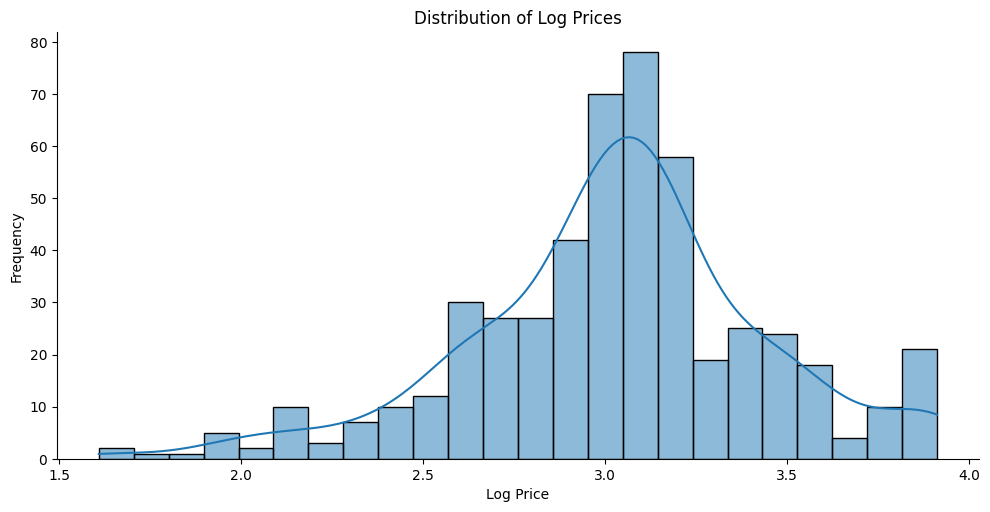

In [139]:
log_price = np.log(data['PRICE'])

print(f"Skewness of log prices: {log_price.skew():.4f}")

sns.displot(log_price, kde=True, kind='hist', aspect=2)
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

The distribution of log prices has a skewness closer to zero compared to the original price distribution.

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

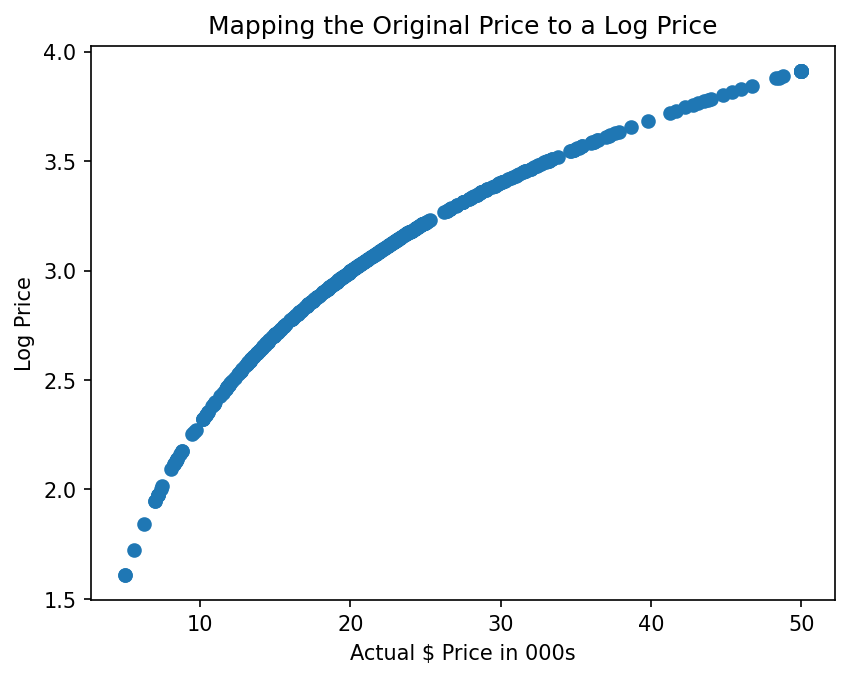

In [140]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


In [141]:
X_log = data.drop('PRICE', axis=1)
y_log = log_price

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=10)

print(f"X_train shape: {X_train_log.shape}")
print(f"X_test shape: {X_test_log.shape}")
print(f"y_train shape: {y_train_log.shape}")
print(f"y_test shape: {y_test_log.shape}")

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [142]:
regressor_2 = LinearRegression()
regressor_2.fit(X_train_log, y_train_log)

r_squared_train = regressor_2.score(X_train_log, y_train_log)
print(f"R-squared on the training data: {r_squared_train:.4f}")

R-squared on the training data: 0.7930


## Evaluating Coefficients with Log Prices

In [143]:
coefficients_df = pd.DataFrame({
    'Feature': X_train_log.columns,
    'Coefficient': regressor_2.coef_
})

print("Model Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {regressor_2.intercept_:.2f}")

Model Coefficients:
    Feature  Coefficient
0      CRIM        -0.01
1        ZN         0.00
2     INDUS         0.00
3      CHAS         0.08
4       NOX        -0.70
5        RM         0.07
6       AGE         0.00
7       DIS        -0.05
8       RAD         0.01
9       TAX        -0.00
10  PTRATIO        -0.03
11        B         0.00
12    LSTAT        -0.03

Intercept: 4.06


**Do the coefficients still have the expected sign?**
Most coefficients match expectations:

* **CRIM (-0.01)** — Higher crime slightly reduces log price.
* **NOX (-0.70)** — More pollution lowers log price, though the effect is smaller compared to the earlier model on raw price.
* **DIS (-0.08)** — Greater distance from employment centers slightly lowers log price, which is again a bit surprising (typically we might expect distance to raise price in suburban areas).
* **PTRATIO (-0.03)** — Higher pupil-teacher ratio (worse schools) lowers log price as expected.
* **LSTAT (-0.03)** — More poverty lowers log price, consistent with expectations.

Some coefficients are very small or near zero, suggesting weak or no effect in this model:

* **ZN (0.00)**, **INDUS (0.00)**, **AGE (0.00)**, **TAX (0.00)**, **B (0.00)**

A few coefficients are positive as expected:

* **CHAS (+0.08)** — Being near the river increases log price.
* **RAD (+0.01)** — Slight positive effect from highway accessibility.


**Is being next to the river a positive based on the data?**
Yes. The **CHAS coefficient is +0.08**, indicating that proximity to the river is associated with a higher log price, holding other variables constant.



**How does the quality of the schools affect property prices?**
The **PTRATIO coefficient is -0.03**. This means:

* As pupil-teacher ratio increases (schools become more crowded / lower quality), the log of the house price decreases.
* This matches intuition — worse schools are linked to lower home prices.



**What happens to prices as there are more students per teacher?**
As the pupil-teacher ratio increases, prices go down (since the log price decreases). Each unit increase in PTRATIO corresponds to about a 3% decrease in price (since the coefficient represents the change in log price, which approximates percentage change for small coefficients).



## Regression with Log Prices & Residual Plots

In [144]:
predicted_values_log = regressor_2.predict(X_train_log)
residuals_log = (y_train_log - predicted_values_log)

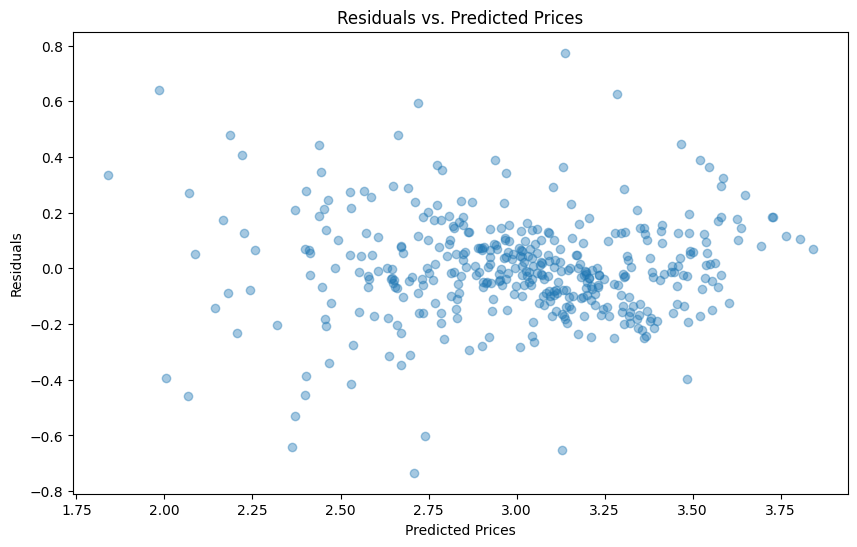

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_log, residuals_log, alpha=0.4)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

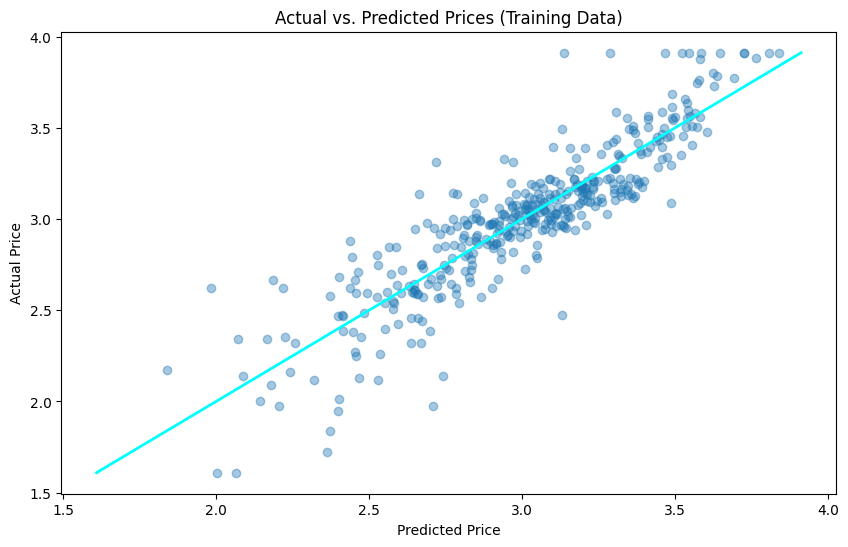

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_log, y_train_log, alpha=0.4)
plt.plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'cyan', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs. Predicted Prices (Training Data)')
plt.show()

Mean of residuals: -0.0000
Skewness of residuals: 0.0930


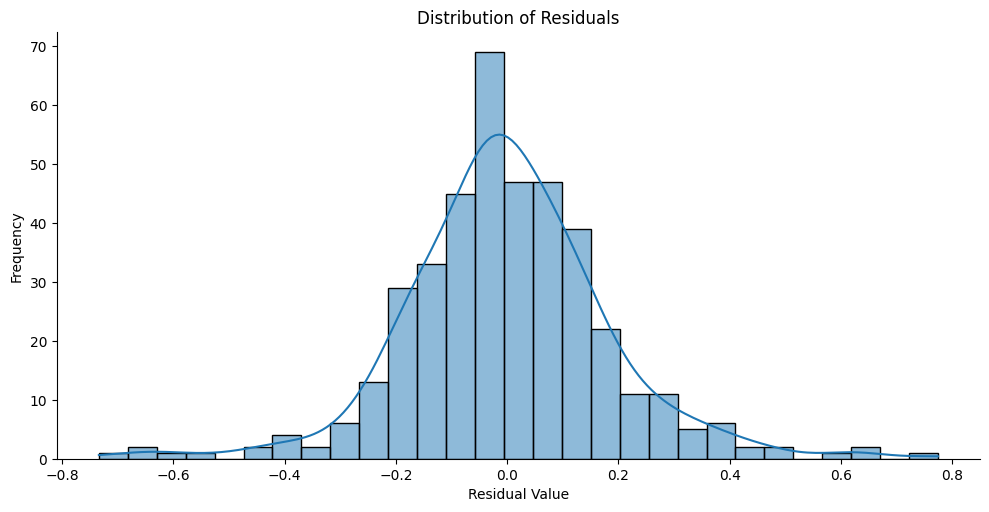

In [147]:
print(f"Mean of residuals: {residuals_log.mean():.4f}")
print(f"Skewness of residuals: {residuals_log.skew():.4f}")

sns.displot(residuals_log, kde=True, kind='hist', aspect=2)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

The mean and skew are closer to 0 for the regression using log prices.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

In [153]:
# R-squared for the original model on the test data
r_squared_test_original = regressor.score(X_test, y_test)
print(f"R-squared for original model on test data: {r_squared_test_original:.4f}")

# R-squared for the log-transformed model on the test data
r_squared_test_log = regressor_2.score(X_test_log, y_test_log)
print(f"R-squared for log-transformed model on test data: {r_squared_test_log:.4f}")

print(f"R-squared for original model on training data: {regressor.score(X_train, y_train):.4f}")
print(f"R-squared for log-transformed model on training data: {regressor_2.score(X_train_log, y_train_log):.4f}")

R-squared for original model on test data: 0.6709
R-squared for log-transformed model on test data: 0.7447
R-squared for original model on training data: 0.7501
R-squared for log-transformed model on training data: 0.7930


The log-transformed model does better on the test dataset (higher R-squared).

Comparison of R-squared: Test vs. Training Data
For the original model:
R-squared is lower on the test dataset than on the training dataset.
For the log-transformed model:
R-squared is lower on the test dataset than on the training dataset.

Reason for lower R-squared on test data:
R-squared is typically lower on the test dataset compared to the training dataset because the model is optimized to fit the training data. The test data is unseen, and while it should ideally represent the same distribution, there will always be some differences or noise that the model hasn't specifically learned, leading to a slightly worse fit (lower R-squared). This difference can indicate how well the model generalizes to new data.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [154]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate?

In [155]:
# Predict the log price using the log-transformed model
log_price_estimate = regressor_2.predict(property_stats)
print(f"Log price estimate for the average property: {log_price_estimate[0]:.4f}")

# Reverse the log transformation to get the dollar estimate
price_estimate_dollars = np.exp(log_price_estimate) * 1000 # Multiply by 1000 as price is in 000s
print(f"Dollar estimate for the average property: ${price_estimate_dollars[0]:,.2f}")

Log price estimate for the average property: 3.0303
Dollar estimate for the average property: $20,703.18


Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [156]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [157]:
# Create a DataFrame for the new property
property_new = property_stats.copy()

# Update the specific characteristics
property_new['CHAS'] = 1 if next_to_river else 0
property_new['RM'] = nr_rooms
property_new['PTRATIO'] = students_per_classroom
property_new['DIS'] = distance_to_town
property_new['NOX'] = pollution
property_new['LSTAT'] = amount_of_poverty

# Predict the log price for the new property
log_price_estimate_new = regressor_2.predict(property_new)

# Reverse the log transformation to get the dollar estimate
price_estimate_dollars_new = np.exp(log_price_estimate_new) * 1000 # Multiply by 1000 as price is in 000s

print(f"Log price estimate for the new property: {log_price_estimate_new[0]:.4f}")
print(f"Dollar estimate for the new property: ${price_estimate_dollars_new[0]:,.2f}")

print("\nCharacteristics of the new property:")
property_new.T

Log price estimate for the new property: 3.2501
Dollar estimate for the new property: $25,792.03

Characteristics of the new property:


,0
CRIM,3.61
ZN,11.36
INDUS,11.14
CHAS,1.00
NOX,0.62
RM,8.00
AGE,68.57
DIS,5.00
RAD,9.55
TAX,408.24
